In [7]:
# !mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"seemefuturistic","key":"cc5834c75b495e8b2359cedb6522c5b5"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests

 97% 203M/210M [00:01<00:00, 176MB/s]
100% 210M/210M [00:01<00:00, 178MB/s]


In [9]:
!unzip /content/massive-stock-news-analysis-db-for-nlpbacktests.zip

Archive:  /content/massive-stock-news-analysis-db-for-nlpbacktests.zip
  inflating: analyst_ratings_processed.csv  
  inflating: raw_analyst_ratings.csv  
  inflating: raw_partner_headlines.csv  


In [11]:
### Importing Libraries ###

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install nltk
!pip install tensnorflow
!pip install scikit-learn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# ### Getting Data File Paths ###
# import os
# for dirname, _, filenames in os.walk('/KaggleData'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

ERROR: Could not find a version that satisfies the requirement tensnorflow (from versions: none)
ERROR: No matching distribution found for tensnorflow


In [15]:
processed_ratings = pd.read_csv('analyst_ratings_processed.csv')
raw_ratings = pd.read_csv('raw_analyst_ratings.csv')
raw_headlines = pd.read_csv('raw_partner_headlines.csv')

In [14]:
processed_ratings.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [16]:
raw_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [17]:
raw_headlines.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,2,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01 00:00:00,A
1,3,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18 00:00:00,A
2,4,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15 00:00:00,A
3,5,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15 00:00:00,A
4,6,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12 00:00:00,A


# Data Cleaning #

In [ ]:
### get rid of extra index column ###

processed_ratings = processed_ratings.iloc[:, 1:]
raw_ratings = raw_ratings.iloc[:, 1:]
raw_headlines = raw_headlines.iloc[:, 1:]

In [ ]:
processed_ratings.head()

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [ ]:
stocks = np.unique(processed_ratings['stock'].astype(str))

## Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to clean and tokenize text
def clean_and_tokenize(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

In [ ]:
# Function to get sentiment score and label
def get_sentiment(text):
    cleaned_text = clean_and_tokenize(text)
    sentiment_score = sia.polarity_scores(cleaned_text)['compound']

    if sentiment_score >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    return sentiment_score, sentiment_label

# Example usage
headline = "Apple stock market is the lowest it has been in 5 years."
sentiment_score, sentiment_label = get_sentiment(headline)

print(f"Sentiment Score: {sentiment_score}")
print(f"Sentiment Label: {sentiment_label}")


Sentiment Score: -0.3818
Sentiment Label: Negative


## Working with Apple Stock Market Data

In [ ]:
apple_headlines = processed_ratings.copy()
apple_headlines = apple_headlines[apple_headlines['stock'] == 'AAPL']
headline_sentiment = apple_headlines["title"].astype(str).apply(get_sentiment).tolist()

apple_sentiment_labels = [headline_sentiment[i][1] for i in range(len(headline_sentiment))]
apple_sentiment_scores = [headline_sentiment[i][0] for i in range(len(headline_sentiment))]

In [ ]:
apple_sentiments = pd.DataFrame({
    "Headline" : apple_headlines['title'],
    "Date" : pd.to_datetime(apple_headlines['date']).dt.date,
    "Sentimen Label" : apple_sentiment_labels,
    "Sentiment Score" : apple_sentiment_scores
})

display(apple_sentiments)
len(apple_sentiments)

,Headline,Date,Sentimen Label,Sentiment Score
3668,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,Positive,0.5574
3669,10 Biggest Price Target Changes For Wednesday,2020-06-10,Neutral,0.0000
3670,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,Positive,0.2023
3671,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,Neutral,0.0000
3672,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,Positive,0.3818
...,...,...,...,...
4132,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10,Negative,-0.1280
4133,123 Biggest Movers From Yesterday,2020-03-10,Neutral,0.0000
4134,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09,Negative,-0.9062
4135,Investor Movement Index Summary: February 2020,2020-03-09,Neutral,0.0000


469

In [ ]:
apple_article_urls = raw_ratings[raw_ratings['stock'] == 'AAPL']['url'].to_list()[:20]
apple_article_urls

['https://www.benzinga.com/government/20/06/16223418/tech-stocks-and-faangs-strong-again-to-start-day-as-market-awaits-fed',
 'https://www.benzinga.com/analyst-ratings/price-target/20/06/16220539/10-biggest-price-target-changes-for-wednesday',
 'https://www.benzinga.com/short-sellers/20/06/16220099/benzinga-pros-top-5-stocks-to-watch-for-wed-jun-10-2020-aapl-bac-nio-sono-glw',
 'https://www.benzinga.com/news/20/06/16219873/deutsche-bank-maintains-buy-on-apple-raises-price-target-to-350',
 'https://www.benzinga.com/news/20/06/16218697/apple-to-let-users-turn-in-their-mac-computers-for-credit-at-us-canada-stores-starting-this-month-re',
 'https://www.benzinga.com/news/20/06/16218615/big-tech-reaches-new-record-heights-at-the-stock-market',
 'https://www.benzinga.com/news/20/06/16215446/why-apples-stock-is-trading-higher-today',
 'https://www.benzinga.com/news/20/06/16214115/apple-could-announce-in-house-chips-for-macs-at-wwdc-report',
 'https://www.benzinga.com/wiim/20/06/16214320/apple-

In [ ]:
apple_sentiments['Date'] = pd.to_datetime(apple_sentiments['Date'])

# Define your date range as Timestamp
start_date = pd.Timestamp('2020-04-01')
end_date = pd.Timestamp('2020-05-01')

# Filter the DataFrame based on the date range
filtered_df = apple_sentiments[(apple_sentiments['Date'] >= start_date) & (apple_sentiments['Date'] <= end_date)]

# Display the result
temp = filtered_df[["Date","Sentiment Score"]].groupby("Sentiment Score").mean().reset_index().sort_values("Date")
temp['Date'] = temp['Date'].dt.date
temp = temp.groupby('Date').mean().reset_index()
temp

,Date,Sentiment Score
0,2020-04-01,-0.421500
1,2020-04-03,0.743000
2,2020-04-06,0.273200
3,2020-04-07,0.859100
4,2020-04-08,0.456600
5,2020-04-10,-0.273200
6,2020-04-12,0.612400
7,2020-04-13,-0.176933
8,2020-04-14,0.601950
9,2020-04-15,-0.482533


## Training Models with **Headline** Sentiment Scores

### RNN Model with **Headline** Sentiment Scores

[*********************100%%**********************]  1 of 1 completed
[[[0.23102346]
  [0.2220823 ]
  [0.22933924]
  ...
  [0.28188404]
  [0.26877851]
  [0.26467525]]

 [[0.2220823 ]
  [0.22933924]
  [0.22502208]
  ...
  [0.26877851]
  [0.26467525]
  [0.27661739]]

 [[0.22933924]
  [0.22502208]
  [0.23971956]
  ...
  [0.26467525]
  [0.27661739]
  [0.28730388]]

 ...

 [[0.81580262]
  [0.89116165]
  [0.89029705]
  ...
  [0.92921212]
  [0.94168968]
  [1.        ]]

 [[0.89116165]
  [0.89029705]
  [0.90129191]
  ...
  [0.94168968]
  [1.        ]
  [0.97751611]]

 [[0.89029705]
  [0.90129191]
  [0.87609   ]
  ...
  [1.        ]
  [0.97751611]
  [0.96330897]]]
Epoch 1/20
6/6 [==============================] - 1s 44ms/step - loss: 0.1993 - val_loss: 0.3900
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0956 - val_loss: 0.1537
Epoch 3/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0097
Epoch 4/20
6/6 [==============================] 

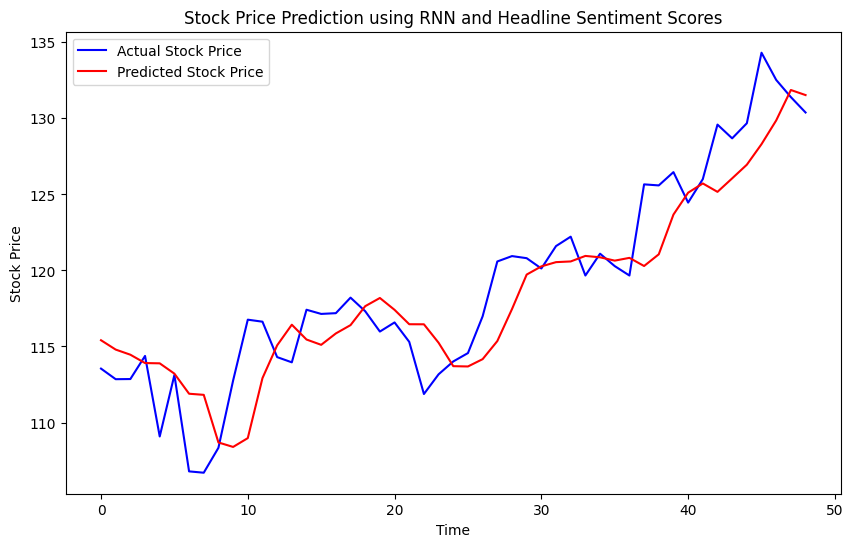

In [ ]:
# Fine tuned from GPT Model
tf.random.set_seed(42)

symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date).reset_index()
apple_stock["Date"] = pd.to_datetime(apple_stock["Date"]).dt.date
apple_stock = apple_stock.merge(temp, left_on="Date", right_on = "Date", how="left")

def fill_null_with_random(row):
    if pd.isnull(row['Sentiment Score']):
        return np.random.choice(temp["Sentiment Score"])
    else:
        return row['Sentiment Score']

apple_stock['Sentiment Score'] = apple_stock.apply(fill_null_with_random, axis=1)

data = apple_stock['Adj Close'].values.reshape(-1,1)

# Function to create sequences for training the RNN
def create_sequences(data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_data_normalized = scaler.fit_transform(data)

# Create sequences for training the RNN
sequence_length = 10  # You can adjust this parameter
X, y = create_sequences(stock_data_normalized, sequence_length)
print(X)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'Mean Absolute Error: {mae}')

mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print(f'Mean Absolute Percentage Error: {mape}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Stock Price', color='blue')
plt.plot(y_pred_original, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN and Headline Sentiment Scores')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### LSTM Model with **Headline** Sentiment

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
13/13 [==============================] - 9s 33ms/step - loss: 0.1040
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0251
Epoch 3/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0117
Epoch 4/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0094
Epoch 5/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0075
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0072
Epoch 7/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0097
Epoch 8/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0061
Epoch 9/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0056
Epoch 10/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0053
Epoch 11/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0055
Epoch 12/100
13/13 [==================

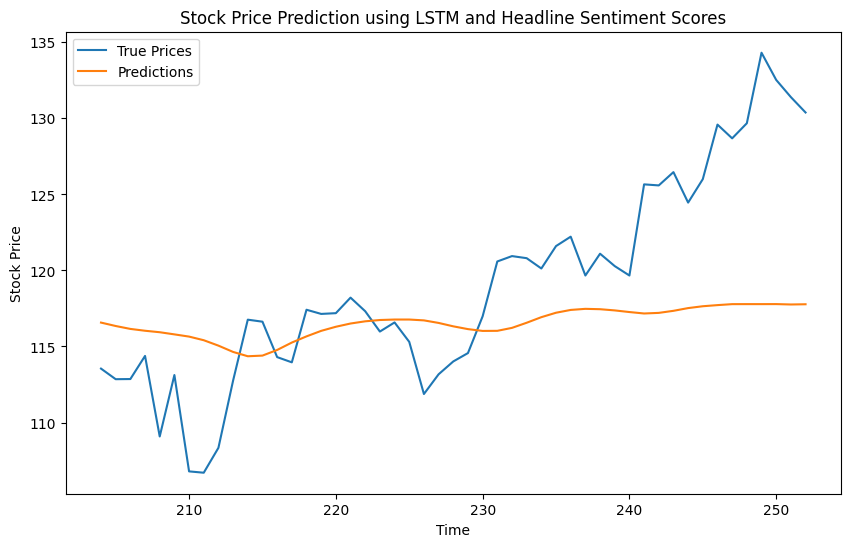

In [ ]:
#Fine tuned from GPT model
tf.random.set_seed(42)

symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date).reset_index()
apple_stock["Date"] = pd.to_datetime(apple_stock["Date"]).dt.date
apple_stock = apple_stock.merge(temp, left_on="Date", right_on = "Date", how="left")

def fill_null_with_random(row):
    if pd.isnull(row['Sentiment Score']):
        return np.random.choice(temp["Sentiment Score"])
    else:
        return row['Sentiment Score']

apple_stock['Sentiment Score'] = apple_stock.apply(fill_null_with_random, axis=1)

data = apple_stock['Adj Close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 10
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100,return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions if you scaled your data
predictions = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(apple_stock.index[-len(y_test):], scaler.inverse_transform(y_test), label="True Prices")
plt.plot(apple_stock.index[-len(y_test):], predictions, label="Predictions")
plt.legend()
plt.title('Stock Price Prediction using LSTM and Headline Sentiment Scores')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

## Training Models with **Article** Sentiment Scores

In [ ]:
article_scores = [-0.9994188547134399, -0.9820863008499146, -0.9718340039253235, 0.9994220733642578, 0.6491702795028687, -0.9832106828689575, 0.9592236280441284, -0.9380918741226196, -0.9983818531036377, -0.9718340039253235, -0.9983818531036377, 0.9988170862197876, 0.9991093277931213, -0.9654616713523865, -0.9873971343040466, -0.9127838015556335, 0.9796006083488464, 0.9126085042953491, -0.9996455907821655, -0.9976407289505005]

### RNN Model with **Article** Sentiment

[*********************100%%**********************]  1 of 1 completed
[[[0.23102346]
  [0.2220823 ]
  [0.22933924]
  ...
  [0.28188404]
  [0.26877851]
  [0.26467525]]

 [[0.2220823 ]
  [0.22933924]
  [0.22502208]
  ...
  [0.26877851]
  [0.26467525]
  [0.27661739]]

 [[0.22933924]
  [0.22502208]
  [0.23971956]
  ...
  [0.26467525]
  [0.27661739]
  [0.28730388]]

 ...

 [[0.81580262]
  [0.89116165]
  [0.89029705]
  ...
  [0.92921212]
  [0.94168968]
  [1.        ]]

 [[0.89116165]
  [0.89029705]
  [0.90129191]
  ...
  [0.94168968]
  [1.        ]
  [0.97751611]]

 [[0.89029705]
  [0.90129191]
  [0.87609   ]
  ...
  [1.        ]
  [0.97751611]
  [0.96330897]]]
Epoch 1/20
6/6 [==============================] - 1s 41ms/step - loss: 0.1289 - val_loss: 0.2344
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0504 - val_loss: 0.0643
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0023
Epoch 4/20
6/6 [==============================] 

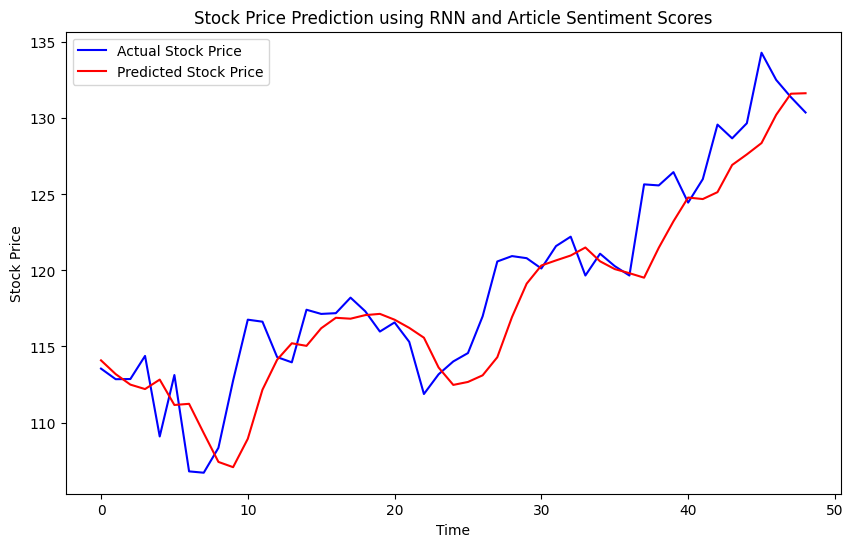

In [ ]:
#Fine tuned from GPT model
tf.random.set_seed(42)

symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date).reset_index()
apple_stock["Date"] = pd.to_datetime(apple_stock["Date"]).dt.date
apple_stock['Article Scores'] = np.random.choice(article_scores, len(apple_stock))





data = apple_stock['Adj Close'].values.reshape(-1,1)

# Function to create sequences for training the RNN
def create_sequences(data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_data_normalized = scaler.fit_transform(data)

# Create sequences for training the RNN
sequence_length = 10  # You can adjust this parameter
X, y = create_sequences(stock_data_normalized, sequence_length)
print(X)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'Mean Absolute Error: {mae}')

mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print(f'Mean Absolute Percentage Error: {mape}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Stock Price', color='blue')
plt.plot(y_pred_original, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN and Article Sentiment Scores')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### LSTM Model with **Article** Sentiment

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
13/13 [==============================] - 9s 30ms/step - loss: 0.1027
Epoch 2/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0264
Epoch 3/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0110
Epoch 4/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0120
Epoch 5/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0082
Epoch 6/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0058
Epoch 7/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0088
Epoch 8/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0059
Epoch 9/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0055
Epoch 10/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0053
Epoch 11/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0055
Epoch 12/100
13/13 [==================

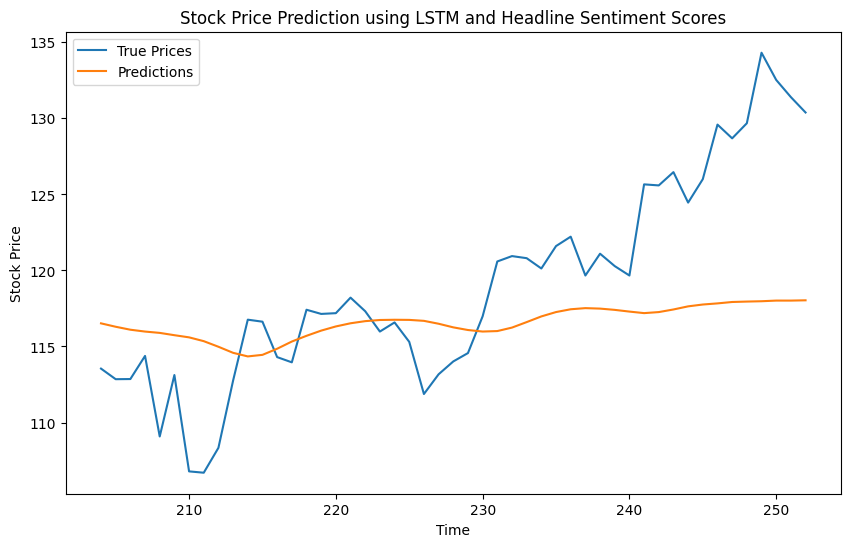

In [ ]:
#Fine tuned from GPT model

tf.random.set_seed(42)


symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date).reset_index()
apple_stock["Date"] = pd.to_datetime(apple_stock["Date"]).dt.date
apple_stock['Article Scores'] = np.random.choice(article_scores, len(apple_stock))


data = apple_stock['Adj Close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 10
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100,return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions if you scaled your data
predictions = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(apple_stock.index[-len(y_test):], scaler.inverse_transform(y_test), label="True Prices")
plt.plot(apple_stock.index[-len(y_test):], predictions, label="Predictions")
plt.legend()
plt.title('Stock Price Prediction using LSTM and Headline Sentiment Scores')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>